In [1]:
# !pip install pymoo

In [2]:
# Make the necessary imports
import numpy as np
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.operators.selection.rnd import RandomSelection
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.core.callback import Callback
from NSGAIIIUIP import NSGA3
# from pymoo.algorithms.moo.nsga3 import NSGA3

# Disable the speedup warning
from pymoo.config import Config
Config.warnings['not_compiled'] = False

# Execution starts
# Initialized successfully


# Generation: 25
# Generation: 50
# Generation: 75
# Generation: 100
# Generation: 125
mild stabilization has reached at gen: 145
# Generation: 150
# Generation: 175
# Generation: 200
# Generation: 225
# Generation: 250
# Generation: 275
# Generation: 300
# Generation: 325
# Generation: 350
# Generation: 375
# Generation: 400
# Generation: 425
# Generation: 450
# Generation: 475
# Generation: 500
# Generation: 525
# Generation: 550
# Generation: 575
# Generation: 600
# Generation: 625
# Generation: 650
# Generation: 675
# Generation: 700
# Generation: 725
# Generation: 750
# Generation: 775
# Generation: 800
# Generation: 825
# Generation: 850
# Generation: 875
# Generation: 900
# Generation: 925
# Generation: 950
# Generation: 975
# Generation: 1000


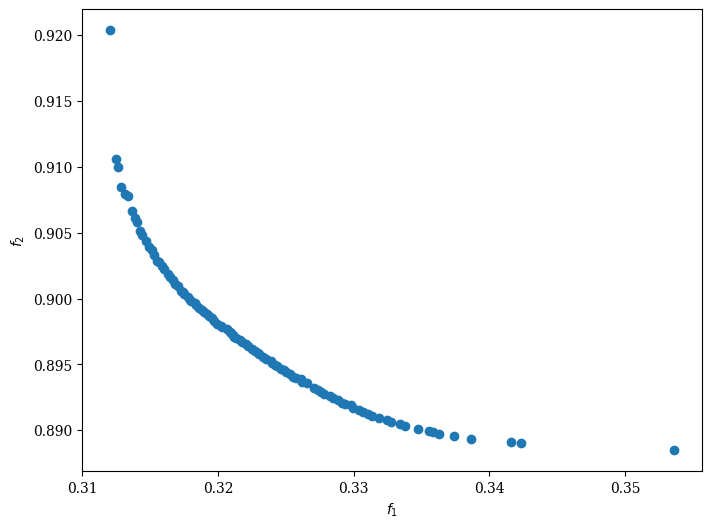

In [ ]:
# Define the problem
problem = get_problem('dascmop1', difficulty = 5)

# Create the reference vectors
ref_dirs = get_reference_directions('das-dennis',2,n_partitions=99)

# Instantiate the algorithm object
algorithm = NSGA3(pop_size=len(ref_dirs), # setting population size same as number of reference vectors
                    ref_dirs= ref_dirs,
                    crossover= SBX(prob=0.9,eta=20), # using SBX crossover operator
                    mutation= PM(prob=1/problem.n_var,eta=10), # using polynomial mutation operator
                    eliminate_duplicates=True, # remove duplicates from the offspring created
                    is_co_learn=True, # enable IP2
                    is_do_learn=True # enable IP3
                    )

# Execute the LHFiD algorithm
res = minimize(problem,
                algorithm,
                ('n_gen', 1000), # setting an arbitrarily high number of generations, LHFiD will terminate automatically before this
                seed=42 # setting the random seed
                )

# Plot the output 
Scatter().add(res.F).show()

(0.0, 1.0)

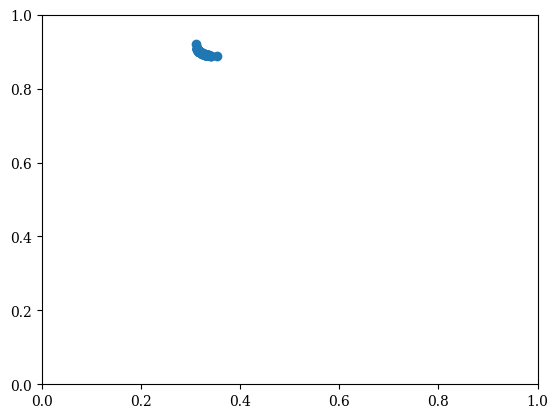

In [4]:
import matplotlib.pyplot as plt

plt.scatter(res.F[:, 0], res.F[:, 1])

plt.xlim(0, 1)
plt.ylim(0, 1)